<a href="https://colab.research.google.com/github/prabirdeb/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cardiovascular Risk Prediction**

## **The performance of a machine learning model depends on three factors:**

**i. Quality of Data**

(cleaner experiences for better learning)

**ii. Quantity of Data**

(more experiences for better learning)

**iii. Quality of Model**

(right model and right hyperparameters for better learning)

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the ml model 

## **1. Connection with the Data**

Here, we are provided with a dataset on the details of patients with or without cardiovascular disease.

Thus, the dataset is actually a collection of experiences about patients with or without cardiovascular disease. 

Now, we need to **decode the set of experiences** to build a model for Cardiovascular Risk Prediction.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import ast
from datetime import datetime
from datetime import date
import re

from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

Using matplotlib backend: agg
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
pip install shap

     |████████████████████████████████| 564 kB 22.1 MB/s 


In [3]:
import shap
shap.initjs()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading the data as pandas dataframe
cardio_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Cardiovascular Risk Prediction-Prabir Debnath/data_cardiovascular_risk.csv')

## **2. First Feelings of the Data**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [6]:
cardio_df.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [7]:
# TenYearCHD: 10 Years Coronary heart disease

## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

In [8]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
cardio_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
# Checking the no. of unique values in each column
print(cardio_df.nunique())

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64


In [11]:
# education: 1 = Some High School; 
# education: 2 = High School or GED; 
# education: 3 = Some College or Vocational School; 
# education: 4 = College

In [12]:
# prevalentStroke : 0 = Stroke not prevalent in family history; 
# prevalentStroke : 1 = Stroke prevalent in family history

In [13]:
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

When there is any string containing a Python literal in any of the important feature, we also evaluate them.

We do encoding of categorical features to make it usuable in the model.

We also create new feature when found important during the analysis.

Thus, we get a clean experience set with important features. 

We check the statistics further on clean data.

###4.1 Creating Dataset with Relavant Features

In [14]:
# Finding out the relavant features from the deeper understanding of the data
relavant_features=['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [15]:
# Creating new df with relavant features
cardio_df_clean=cardio_df[relavant_features]

###4.2 Treating the missing, null or duplicate values

In [16]:
# Checking is there any duplicate value
len(cardio_df_clean[cardio_df_clean.duplicated()]) 

0

In [17]:
# checking the no. of null values in each column
print(cardio_df_clean.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [18]:
# Imputation of Null values in numerical variables with median
for column_name in ['cigsPerDay', 'totChol', 'BMI','heartRate', 'glucose']:
  cardio_df_clean[column_name]=cardio_df_clean[column_name].fillna(cardio_df_clean[column_name].median())


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
# Imputation of Null values in categorical variables with mode
for column_name in ['education', 'BPMeds']:
  cardio_df_clean[column_name]=cardio_df_clean[column_name].fillna(cardio_df_clean[column_name].mode()[0])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
print(cardio_df_clean.isnull().sum())

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [21]:
cardio_df_clean.shape

(3390, 16)

###4.3 Evaluation of Python Literals

In [22]:
# numerical_features
cardio_df_clean.describe().columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [23]:
# categorical_features
cardio_df_clean.describe(include=['object','category']).columns

Index(['sex', 'is_smoking'], dtype='object')

In [24]:
# There is no python literals as string in any of the columns

###4.4 Feature Engineering

In [25]:
# Need for feature engineering not found

###4.5 Encoding of Categorical Features

In [26]:
# Checking value counts in categorical features
for column_name in cardio_df_clean.describe(include=['object','category']).columns:
  print(colored(f"Value counts for {column_name}:", attrs=['bold']))
  print(cardio_df_clean[column_name].value_counts())

Value counts for sex:
F    1923
M    1467
Name: sex, dtype: int64
Value counts for is_smoking:
NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [27]:
# Encoding 'Sex' column
cardio_df_clean['sex'] = cardio_df_clean['sex'].apply(lambda x : 0 if x == 'F' else 1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
# Encoding 'is_smoking' column
cardio_df_clean['is_smoking'] = cardio_df_clean['is_smoking'].apply(lambda x : 0 if x == 'NO' else 1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## **5. Treating Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the true **outliers** or **exceptional or abnormal experiences** and keep them aside.

In [29]:
# Here actual numerical features are.. 
# ['age', 'cigsPerDay', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [30]:
# Converting numerical feature to categorical feature for outlier experience detection
# Thus we can divide numerical features into two categories: Highly and Low
outlier_detect_df=cardio_df_clean[cardio_df_clean.describe().columns]

for col in ['age', 'cigsPerDay', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']:
  limit=outlier_detect_df[col].min()+(outlier_detect_df[col].max()-outlier_detect_df[col].min())/2
  outlier_detect_df[col] = cardio_df_clean[col].apply(lambda x : 'low' if x < limit else 'high')


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested seque

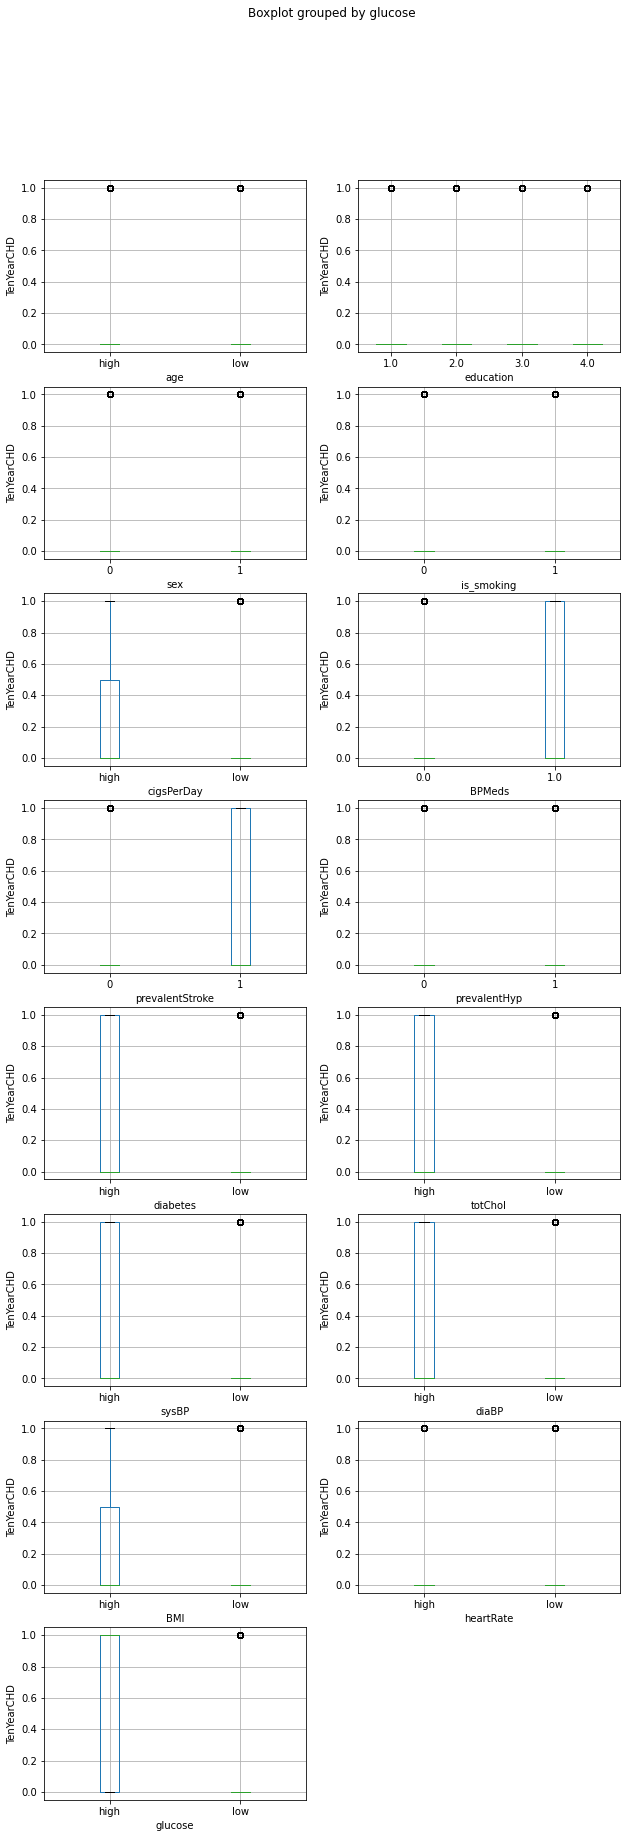

In [31]:
# Checking outliers
fig = plt.figure(figsize=(10, 30))
a=1
for col in outlier_detect_df.columns[:-1]:
  plt.subplot(8,2, a)
  ax = fig.gca()
  outlier_detect_df.boxplot(column = 'TenYearCHD', by = col, ax = ax)
  ax.set_title('');
  ax.set_ylabel("TenYearCHD")
  a=a+1
plt.show()

In [32]:
# For most of the features, class 1 targets are outliers
# Thus we need more experience with class 1 targets to bring a balance in prediction

## **6. Final Feature Selection from the Data**

Now we need to understand the distribution of the features and the relationship among the features for the decision of transformation, scaling and final selection of features.

###6.1 Overall Feature Understanding

<Figure size 504x504 with 0 Axes>

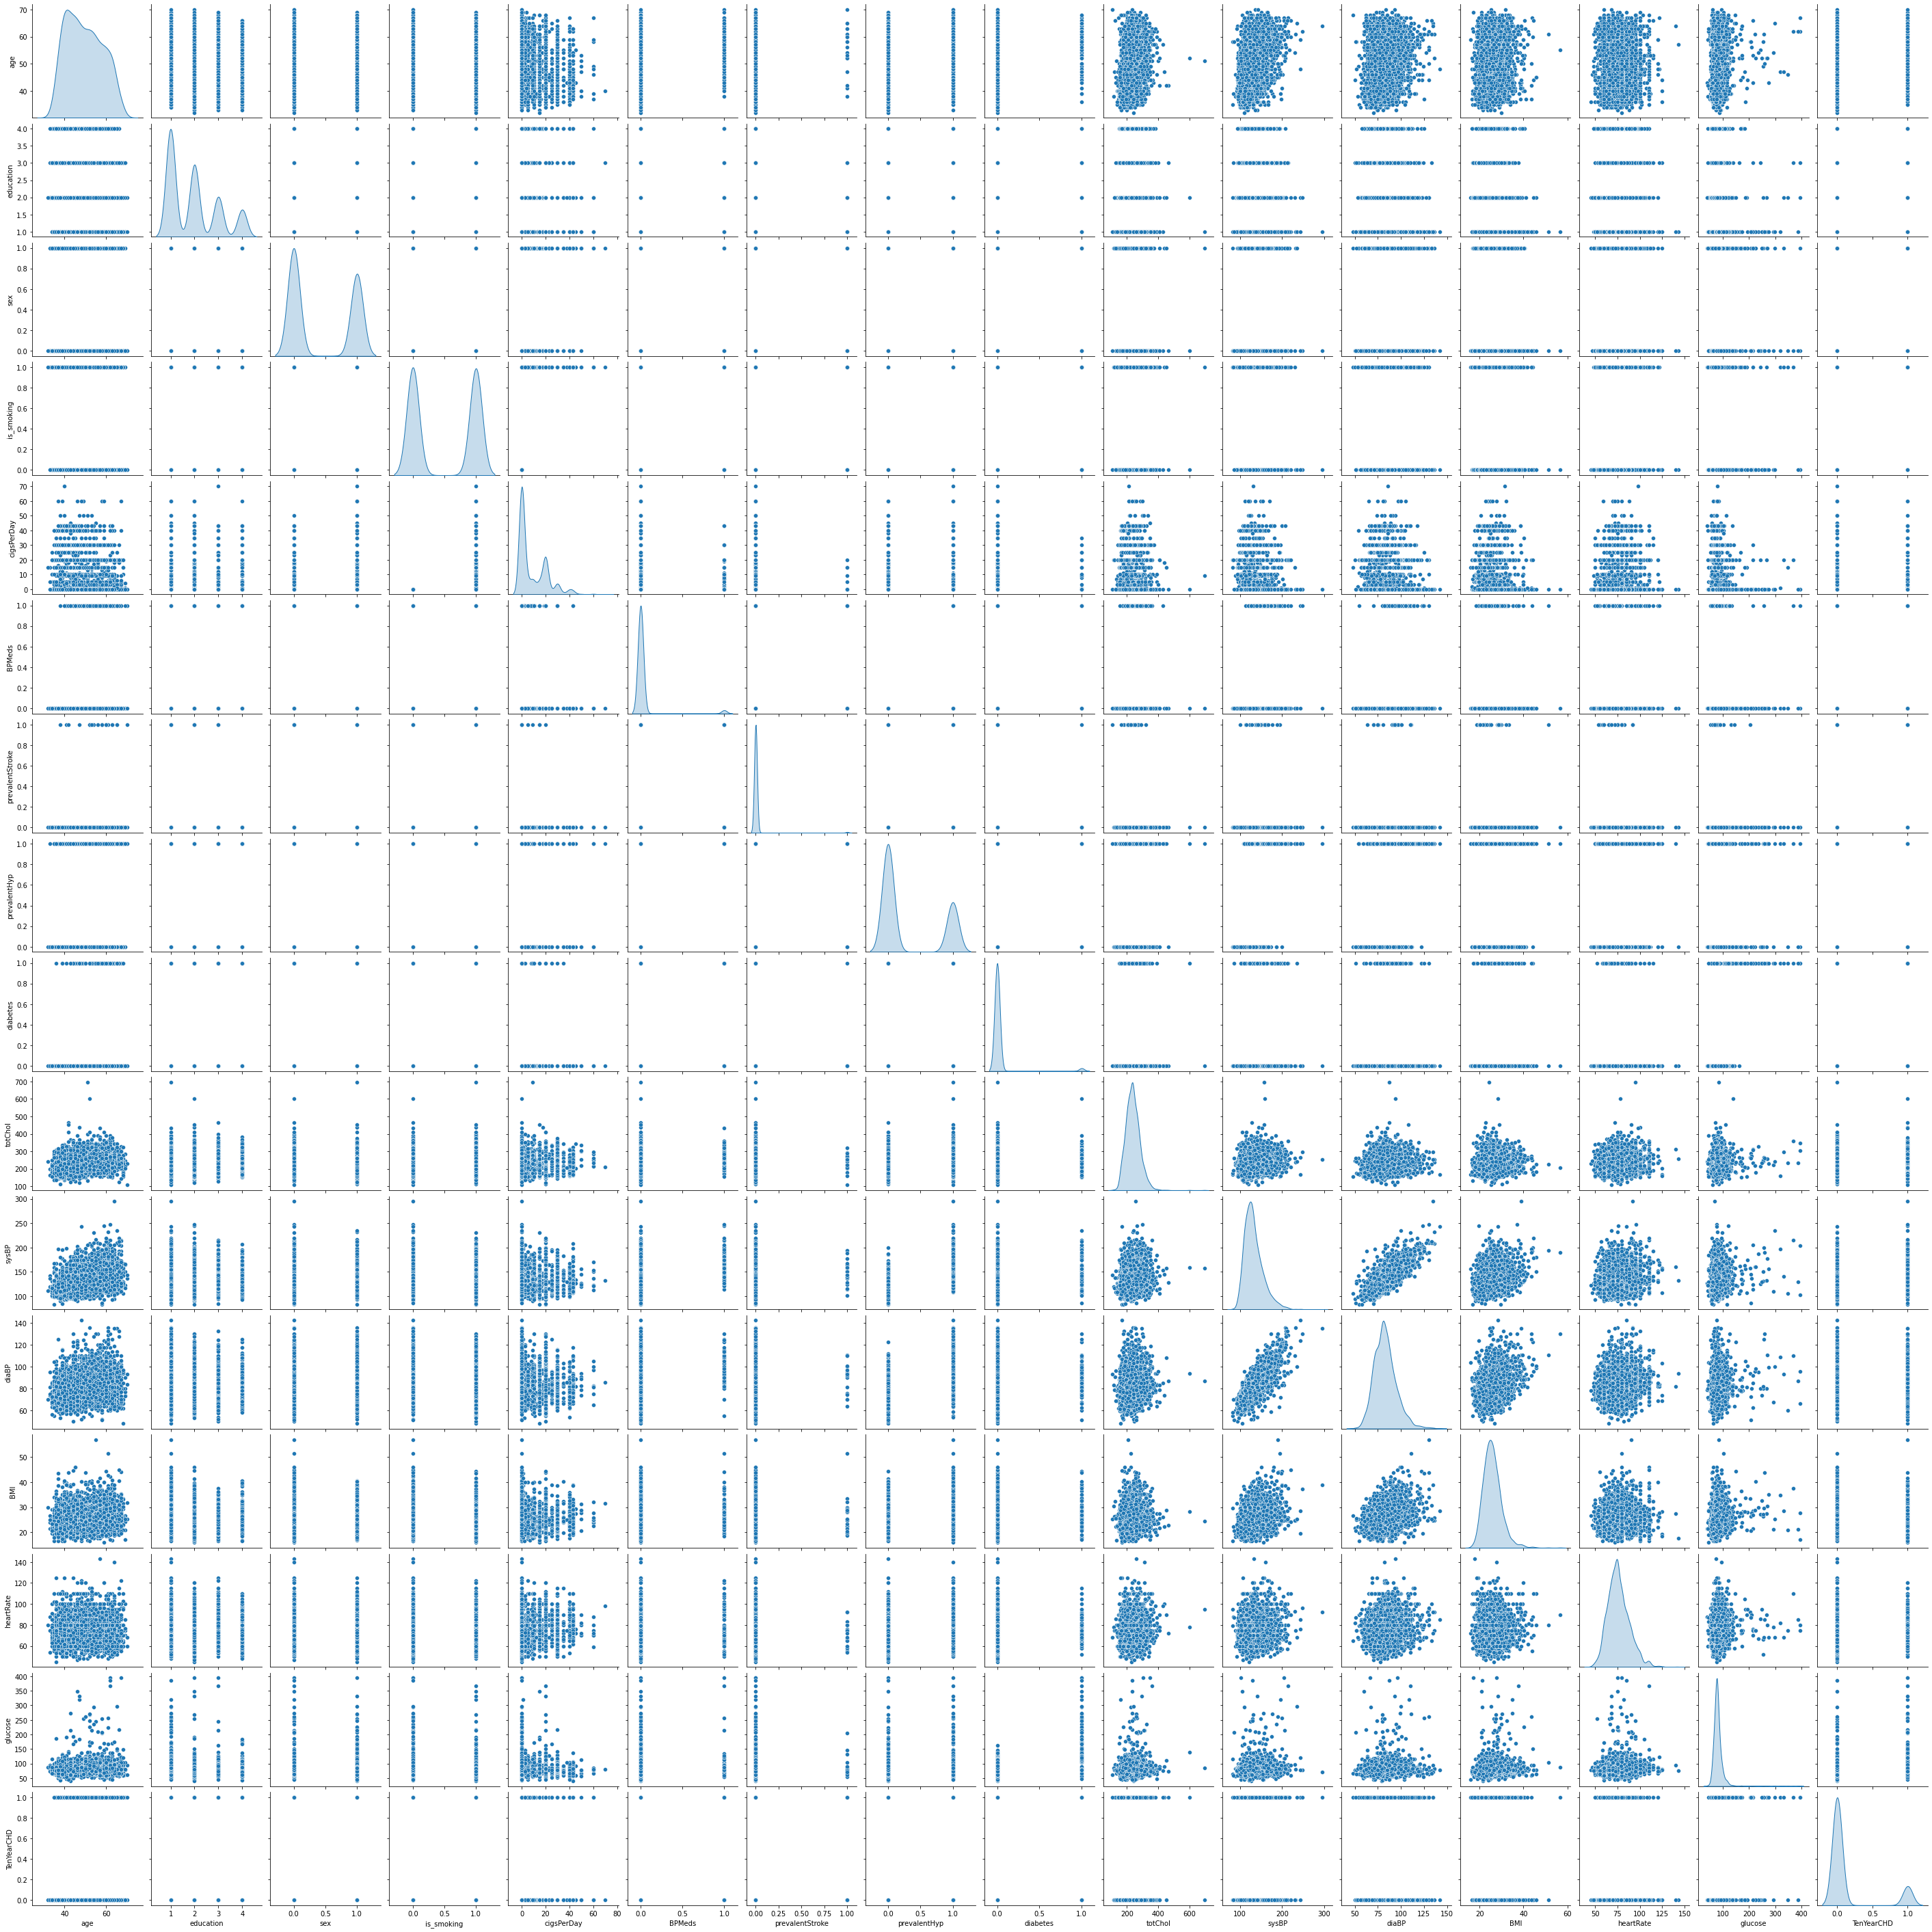

In [33]:
# Univariate, bivariate and multivariate analysis in a single plot
plt.figure(figsize=(7,7))
sns.pairplot(data=cardio_df_clean, kind='scatter', diag_kind='kde')
plt.show()

###6.2 Looking for Normal Distribution of Features

In [34]:
# There is a huge imbalanced class in the target variable. 
# For positive heart disease there are only around 500 experiences with respect to around 3000 in negative heart disease
# Thus, our model is expected to predict the cases where there is no heart disease, more accurately

divide by zero encountered in log10


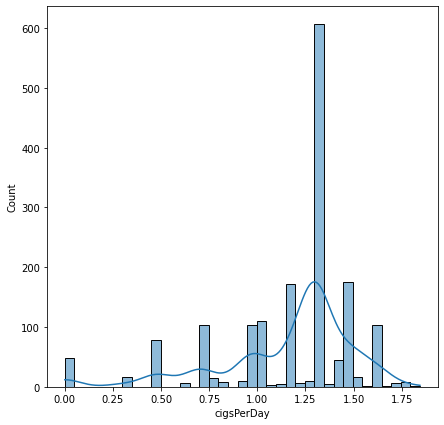

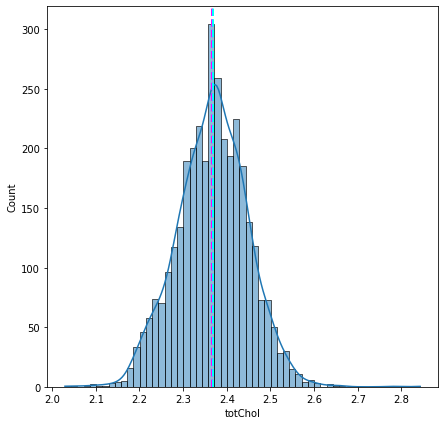

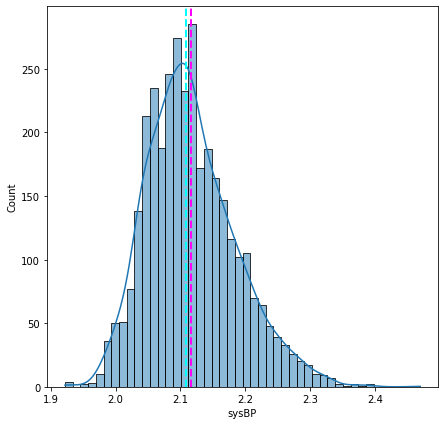

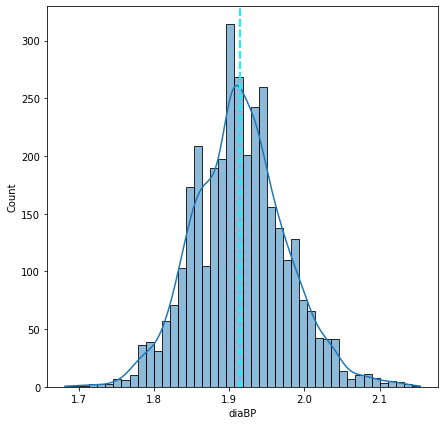

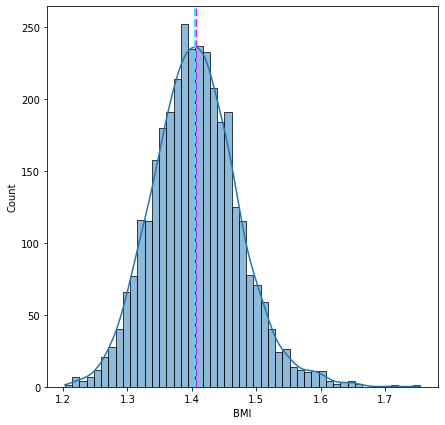

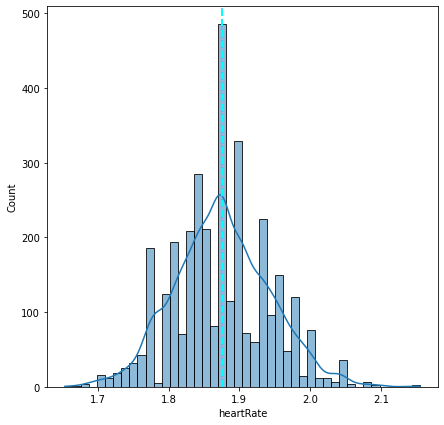

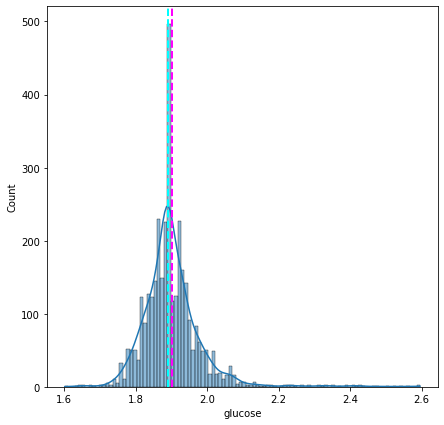

In [35]:
# We can see the many numerical columns are positively skewed. Thus need log transformation
# Checking distribution after log transformation
for col in ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = np.log10(cardio_df_clean[col])
    sns.histplot(feature, kde=True)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.show()

###6.3 Looking for Relationship between Dependent and Independent Features

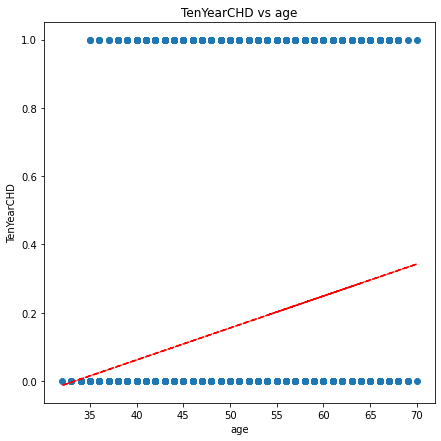

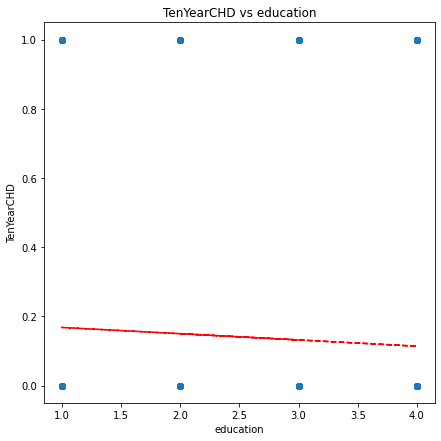

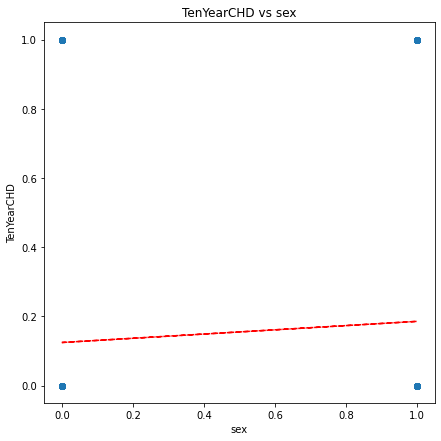

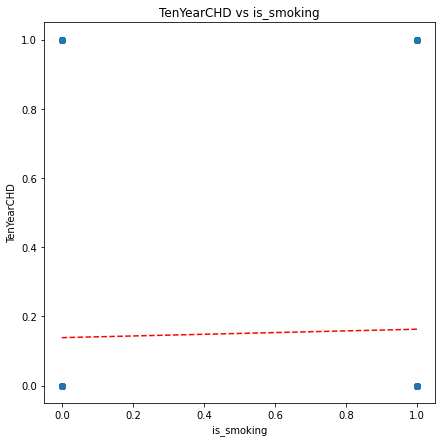

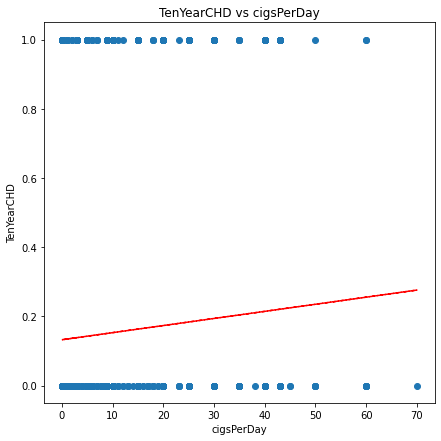

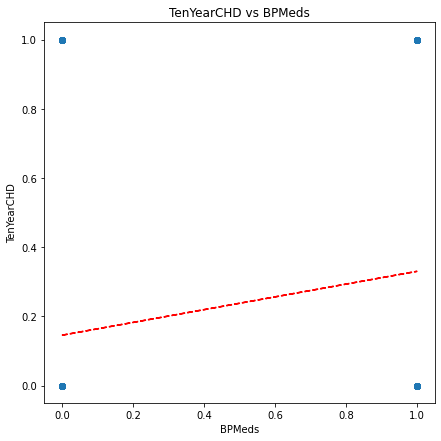

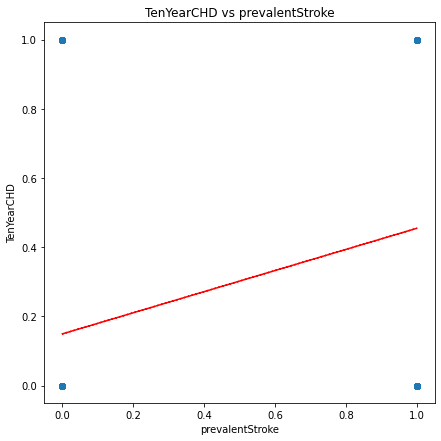

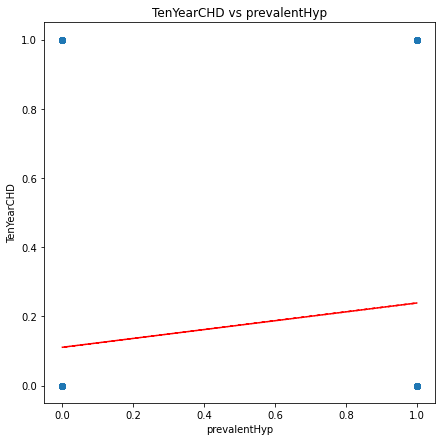

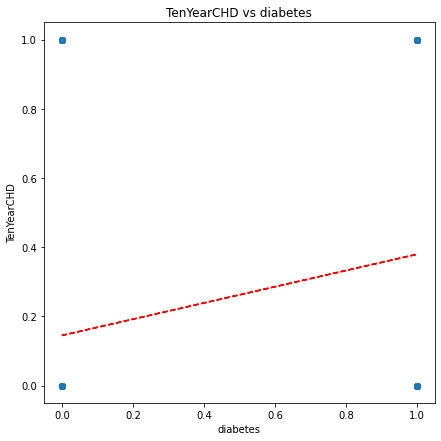

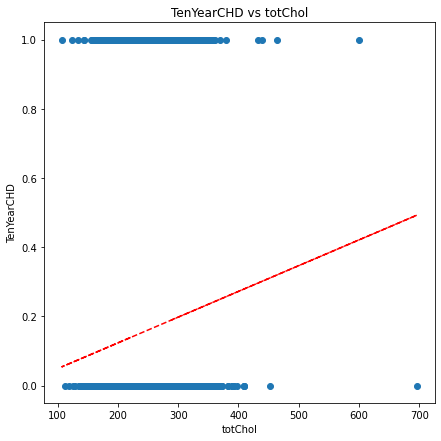

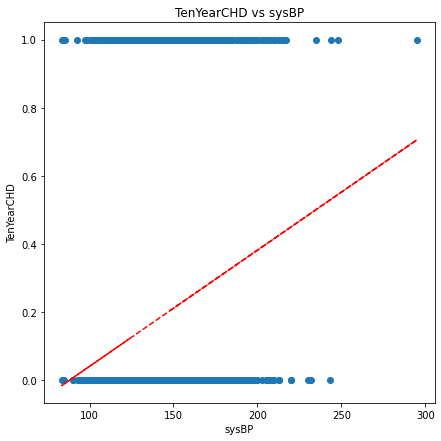

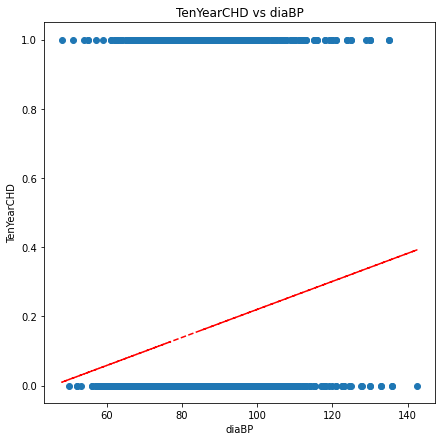

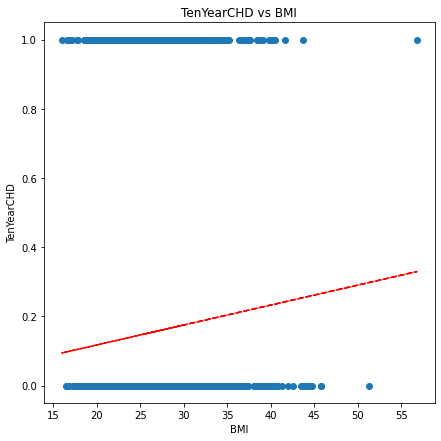

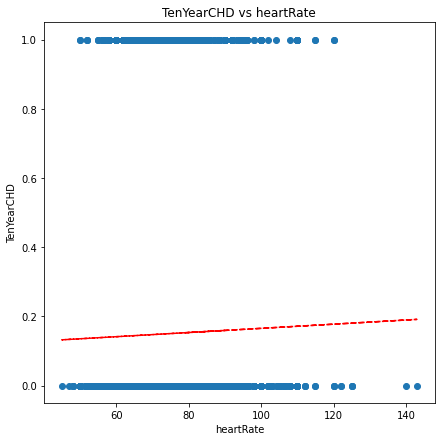

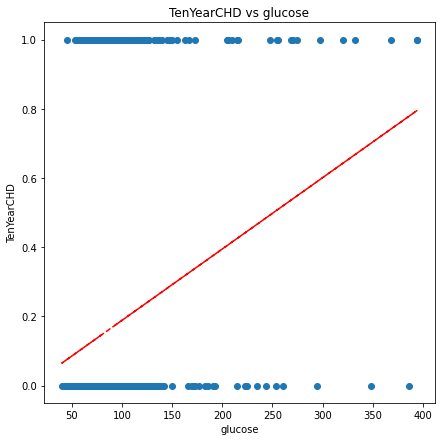

In [36]:
# Checking linearship relation of dependent variable with independent variables
for col in cardio_df_clean.describe().columns[:-1]:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = cardio_df_clean[col]
    label = cardio_df_clean['TenYearCHD']
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    ax.set_title('TenYearCHD vs ' + col)
    fit = np.polyfit(feature, label, deg=1) 
    p = np.poly1d(fit) 
    plt.plot(feature,p(feature),"r--") 
plt.show()

###6.4 Looking for Truly Independent Features

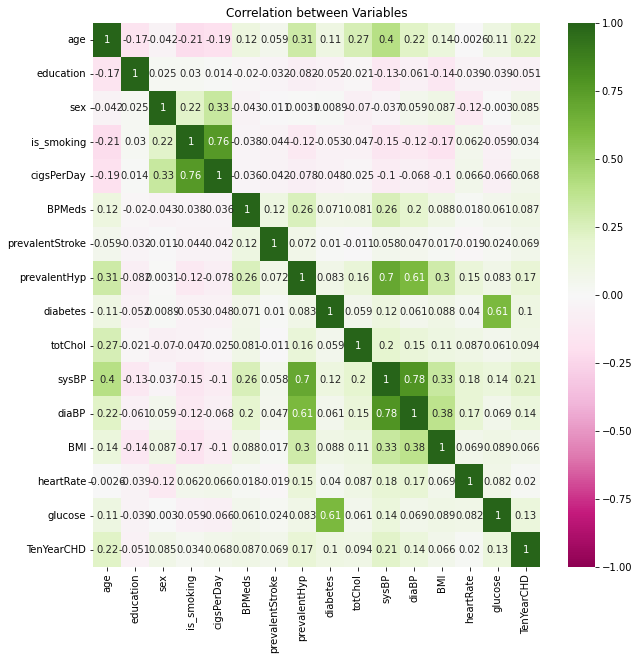

In [37]:
# Checking multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(cardio_df_clean.corr(), vmin=-1, cmap='PiYG', annot=True)
plt.title('Correlation between Variables')
plt.show()

In [38]:
# Creating function for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [39]:
calc_vif(cardio_df_clean[[i for i in cardio_df_clean.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,41.225851
1,education,4.583767
2,sex,2.122942
3,is_smoking,4.835647
4,cigsPerDay,4.104053
5,BPMeds,1.133711
6,prevalentStroke,1.027022
7,prevalentHyp,2.412088
8,diabetes,1.583044
9,totChol,30.788509


In [40]:
# There are few features with multicolinearity and high VIF, thus need to be removed

In [41]:
cardio_df_clean.drop(['sysBP'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
cardio_df_clean.drop(['diaBP'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
cardio_df_clean.drop(['BMI'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
cardio_df_clean.drop(['age'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
cardio_df_clean.drop(['heartRate'], axis=1, inplace=True) 


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
cardio_df_clean.drop(['totChol'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
# There is high correlation with 'is_smoking' and 'cigsPerDay'. Lets drop 'is_smoking'
cardio_df_clean.drop(['is_smoking'], axis=1, inplace=True) 


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
# There is high correlation with 'glucose' and 'diabetes'. Lets drop 'diabetes'
cardio_df_clean.drop(['diabetes'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [49]:
calc_vif(cardio_df_clean[[i for i in cardio_df_clean.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,education,3.655103
1,sex,1.957236
2,cigsPerDay,1.733063
3,BPMeds,1.117896
4,prevalentStroke,1.024059
5,prevalentHyp,1.561774
6,glucose,4.497470


In [50]:
# Now all the VIF are below 10

## **7. Preparation of Input and Output Data**

###7.1 Normalization

In [51]:
# Creating dependent(output) and independent(input) variable
dependent_variable='TenYearCHD'
independent_variables=list(set(cardio_df_clean.describe().columns)-{dependent_variable})
print(independent_variables)

['prevalentStroke', 'glucose', 'cigsPerDay', 'sex', 'prevalentHyp', 'education', 'BPMeds']


In [52]:
# Creating normalized input and output dataset
X = np.log10(cardio_df_clean[['cigsPerDay', 'glucose']])
X[list(set(independent_variables)-{'cigsPerDay', 'glucose'})]=cardio_df_clean[list(set(independent_variables)-{'cigsPerDay', 'glucose'})]

y = cardio_df_clean[dependent_variable]

In [53]:
# Checking is there any infinite values after normalization
X.describe()

invalid value encountered in subtract


,cigsPerDay,glucose,prevalentStroke,sex,prevalentHyp,education,BPMeds
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,-inf,1.902066,0.006490,0.432743,0.315339,1.946018,0.029499
std,NaN,0.085784,0.080309,0.495529,0.464719,1.017568,0.169224
min,-inf,1.602060,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,1.857332,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,1.892095,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.301030,1.929419,0.000000,1.000000,1.000000,3.000000,0.000000
max,1.845098,2.595496,1.000000,1.000000,1.000000,4.000000,1.000000


In [54]:
# Imputation of infinite values with zero
for col in X.columns:
  X[col].replace([np.inf, -np.inf], 0, inplace=True)

In [55]:
X.describe()

,cigsPerDay,glucose,prevalentStroke,sex,prevalentHyp,education,BPMeds
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,0.568459,1.902066,0.006490,0.432743,0.315339,1.946018,0.029499
std,0.630271,0.085784,0.080309,0.495529,0.464719,1.017568,0.169224
min,0.000000,1.602060,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.857332,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.892095,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.301030,1.929419,0.000000,1.000000,1.000000,3.000000,0.000000
max,1.845098,2.595496,1.000000,1.000000,1.000000,4.000000,1.000000


###7.2 Train-Test Spliting

In [56]:
# Splitting of the data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###7.3 Scaling

In [57]:
# Standardization of Input Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train.shape

(2712, 7)

# **Building and Evaluation of Model-1**

In [59]:
# Model cross validation and hyperparameter tuning
model_rf=RandomForestClassifier()
parameters = {'n_estimators':[int(x) for x in np.linspace(50,500,num=10)], 
              'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
              'max_features':['auto','sqrt'],
              'min_samples_split':[2,5,10,15,100],
              'min_samples_leaf':[1,2,5,10]}
model_rf_cv = RandomizedSearchCV(model_rf, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=0, scoring='r2')

In [60]:
model_rf_cv.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 100}

In [61]:
model_rf_final = RandomForestClassifier(max_depth= 25, max_features= 'auto',
                                       min_samples_leaf= 5, min_samples_split= 15,
                                       n_estimators= 100)
model_rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=15)

In [62]:
# Checking model performance for train set
y_train_preds_rf = model_rf_final.predict(X_train)
rf_train_accuracy = round(accuracy_score(y_train, y_train_preds_rf),2)
print("Accuracy:",rf_train_accuracy)
rf_train_f1=round(f1_score(y_train, y_train_preds_rf, average='macro'),2)
print("F1:",rf_train_f1)
rf_train_roc=round(roc_auc_score(y_train,y_train_preds_rf),2)
print("ROC_AUC_Score:",rf_train_roc)

Accuracy: 0.86
F1: 0.51
ROC_AUC_Score: 0.53


In [63]:
# Checking model performance for test set
y_test_preds_rf = model_rf_final.predict(X_test)
rf_test_accuracy = round(accuracy_score(y_test, y_test_preds_rf),2)
print("Accuracy:",rf_test_accuracy)
rf_test_f1= round(f1_score(y_test, y_test_preds_rf, average='macro'),2)
print("F1:",rf_test_f1)
rf_test_roc=round(roc_auc_score(y_test,y_test_preds_rf),2)
print("ROC_AUC_Score:",rf_test_roc)

Accuracy: 0.84
F1: 0.47
ROC_AUC_Score: 0.5


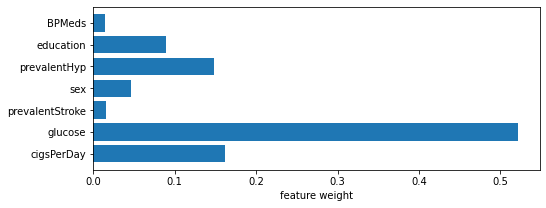

In [64]:
# Checking Feature importance
plt.figure(figsize=(8, 3))
y=list(X.columns)
x=list(model_rf_final.feature_importances_)
plt.barh(y,x)
plt.xlabel('feature weight')
plt.show()

# **Building  and Evaluation of Model-2**

In [65]:
# Model cross validation and hyperparameter tuning
model_knn = KNeighborsClassifier()
parameters = {'n_neighbors':[int(x) for x in np.linspace(3,21,num=10)], 
              'leaf_size':[int(x) for x in np.linspace(10,50,num=5)]}
model_knn_cv = RandomizedSearchCV(model_knn, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_knn_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 20, 30, 40, 50],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19, 21]},
                   random_state=0, scoring='r2')

In [66]:
model_knn_cv.best_params_

{'leaf_size': 30, 'n_neighbors': 19}

In [67]:
model_knn_final = KNeighborsClassifier(n_neighbors= 19, leaf_size= 30)
model_knn_final.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [68]:
# Checking model performance for train set
y_train_preds_knn = model_knn_final.predict(X_train)
knn_train_accuracy = round(accuracy_score(y_train, y_train_preds_knn),2)
print("Accuracy:",knn_train_accuracy)
knn_train_f1= round(f1_score(y_train, y_train_preds_knn, average='macro'),2)
print("F1:",knn_train_f1)
knn_train_roc=round(roc_auc_score(y_train,y_train_preds_knn),2)
print("ROC_AUC_Score:",knn_train_roc)

Accuracy: 0.85
F1: 0.49
ROC_AUC_Score: 0.51


In [69]:
# Checking model performance for test set
y_test_preds_knn = model_knn_final.predict(X_test)
knn_test_accuracy = round(accuracy_score(y_test, y_test_preds_knn),2)
print("Accuracy:",knn_test_accuracy)
knn_test_f1= round(f1_score(y_test, y_test_preds_knn, average='macro'),2)
print("F1:",knn_test_f1)
knn_test_roc=round(roc_auc_score(y_test,y_test_preds_knn),2)
print("ROC_AUC_Score:",knn_test_roc)

Accuracy: 0.84
F1: 0.48
ROC_AUC_Score: 0.51


  0%|          | 0/678 [00:00<?, ?it/s]

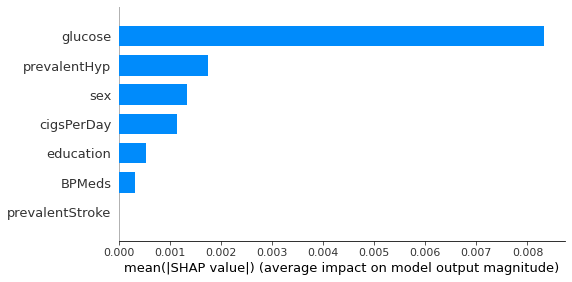

In [70]:
# Checking Feature importance
shap_values = shap.KernelExplainer(model_knn_final.predict, X_train[100:150], link='identity').shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=list(X.columns), plot_type="bar")

  0%|          | 0/678 [00:00<?, ?it/s]

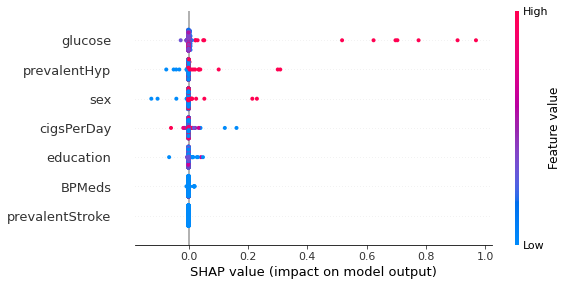

In [71]:
# Checking feature importances
shap_values = shap.KernelExplainer(model_knn_final.predict, X_train[100:150], link='identity').shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=list(X.columns), plot_type="dot")

# **Building  and Evaluation of Model-3**

In [72]:
# Model cross validation and hyperparameter tuning
model_svc = SVC()
parameters = {'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
              'C':[int(x) for x in np.linspace(1,10,num=10)]}
model_svc_cv = RandomizedSearchCV(model_svc, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_svc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9]},
                   random_state=0, scoring='r2')

In [73]:
model_svc_cv.best_params_

{'C': 6, 'gamma': 0.1}

In [74]:
model_svc_final=SVC(C= 6, gamma= 0.1)
model_svc_final.fit(X_train, y_train)

SVC(C=6, gamma=0.1)

In [75]:
# Checking model performance for train set
y_train_preds_svc = model_svc_final.predict(X_train)
svc_train_accuracy = round(accuracy_score(y_train, y_train_preds_svc),2)
print("Accuracy:",svc_train_accuracy)
svc_train_f1=round(f1_score(y_train, y_train_preds_svc, average='macro'),2)
print("F1:",svc_train_f1)
svc_train_roc=round(roc_auc_score(y_train,y_train_preds_svc),2)
print("ROC_AUC_Score:",svc_train_roc)

Accuracy: 0.86
F1: 0.52
ROC_AUC_Score: 0.53


In [76]:
# Checking model performance for test set
y_test_preds_svc = model_svc_final.predict(X_test)
svc_test_accuracy = round(accuracy_score(y_test, y_test_preds_svc),2)
print("Accuracy:",svc_test_accuracy)
svc_test_f1= round(f1_score(y_test, y_test_preds_svc, average='macro'),2)
print("F1:",svc_test_f1)
svc_test_roc=round(roc_auc_score(y_test,y_test_preds_svc),2)
print("ROC_AUC_Score:",svc_test_roc)

Accuracy: 0.84
F1: 0.46
ROC_AUC_Score: 0.5


  0%|          | 0/678 [00:00<?, ?it/s]

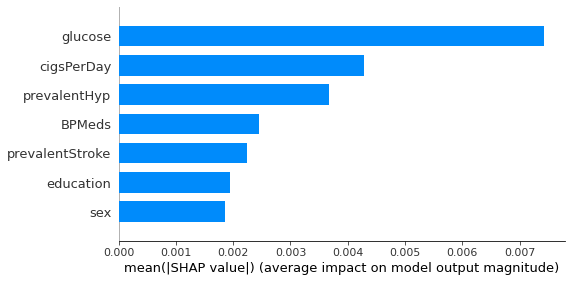

In [77]:
# Checking Feature importance
shap_values = shap.KernelExplainer(model_svc_final.predict, X_train[100:150], link='identity').shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=list(X.columns), plot_type="bar")

# **Conclusion**

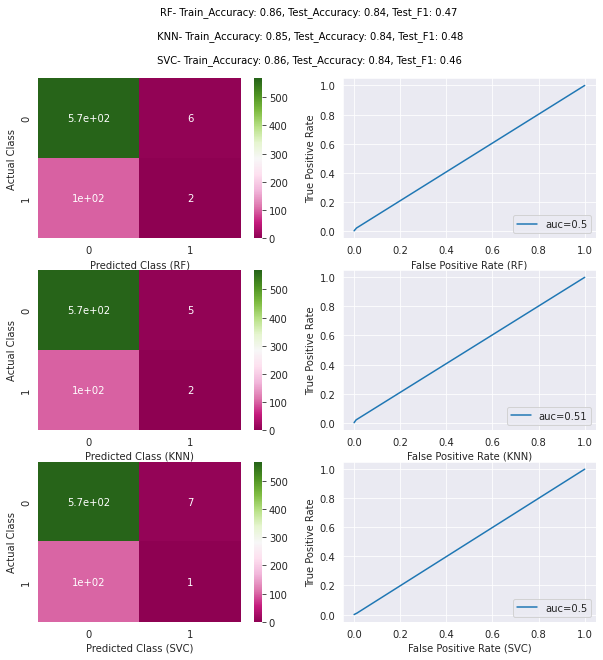

In [78]:
# Performance Comparison of Models
plt.figure(figsize=(10, 10))
plt.suptitle(f'RF- Train_Accuracy: {rf_train_accuracy}, Test_Accuracy: {rf_test_accuracy}, Test_F1: {rf_test_f1}\n\n KNN- Train_Accuracy: {knn_train_accuracy}, Test_Accuracy: {knn_test_accuracy}, Test_F1: {knn_test_f1}\n\n SVC- Train_Accuracy: {svc_train_accuracy}, Test_Accuracy: {svc_test_accuracy}, Test_F1: {svc_test_f1}', fontsize=10)
sns.set_style("darkgrid")

plt.subplot(3,2, 1)
rf_test_cm = confusion_matrix(y_test, y_test_preds_rf)
sns.heatmap(rf_test_cm, vmin=0, cmap='PiYG', annot=True)
plt.xlabel('Predicted Class (RF)')
plt.ylabel('Actual Class')

plt.subplot(3,2, 2)
fpr, tpr, _ = roc_curve(y_test,  y_test_preds_rf)
plt.plot(fpr,tpr,label="auc="+str(rf_test_roc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (RF)')
plt.ylabel('True Positive Rate')

plt.subplot(3,2, 3)
knn_test_cm = confusion_matrix(y_test, y_test_preds_knn)
sns.heatmap(knn_test_cm, vmin=0, cmap='PiYG', annot=True)
plt.xlabel('Predicted Class (KNN)')
plt.ylabel('Actual Class')

plt.subplot(3,2, 4)
fpr, tpr, _ = roc_curve(y_test,  y_test_preds_knn)
plt.plot(fpr,tpr,label="auc="+str(knn_test_roc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (KNN)')
plt.ylabel('True Positive Rate')

plt.subplot(3,2, 5)
svc_test_cm = confusion_matrix(y_test, y_test_preds_svc)
sns.heatmap(svc_test_cm, vmin=0, cmap='PiYG', annot=True)
plt.xlabel('Predicted Class (SVC)')
plt.ylabel('Actual Class')

plt.subplot(3,2, 6)
fpr, tpr, _ = roc_curve(y_test,  y_test_preds_svc)
plt.plot(fpr,tpr,label="auc="+str(svc_test_roc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (SVC)')
plt.ylabel('True Positive Rate')

plt.show()

i. In our final Random Forest model, test accuracy is 84% and variance in prediction is 2%

ii. In our final KNN model, test accuracy is 84% and variance in prediction is 1%

iii. In our final SVC model, test accuracy is 84% and variance in prediction is 2%

iv. On the basis of the performance study of our three models, we are selecting **KNN** classifier (*the best warrior*) for predicting 10 Years Coronary heart disease, as it has low variance in prediction, good f1_score and good ROC_AUC score among all three models models